# **Data Science Milestone 1**


Our group will consist of **Luke Albright and James Manzer** for the data science project and presentation. We are exploring the Fama-French three factor model combined with equity markets, as well as Major League Baseball statistics as two prospective datasets for our project, which are explained further below (links at the bottom of the page).

# **Collaboration Plan**

We are roommates which makes collaboration throughout this project much easier. We plan to store any pertinent data and code through GitHub and Google CoLab. Our schedules align best on Monday and Wednesdays (as well as weekends) which is when we plan to complete any necessary meetings or collaborative work. However, noting again that we are roommates, we expect our schedule to be much more fluid. Our GitHub site can be found at this link: https://github.com/lalbright22/DataScience2023.git  

# **Dataset 1:**

The first dataset we are interested in studying involves the Fama-French Data Library. James and Luke are both finance majors and have a strong interest in understanding financial markets and the instruments traded in them.

The Fama-French Three-Factor model improved the historically significant CAPM asset pricing model, which is able to explain approximately 70% of portfolio returns. By including two additional factors that adjust the model based on the sensitivity of and excess returns of companies' market capitalization and book-to-market ratio, the updated three-factor model is able to explain approximately 90% of portfolio returns. We believe a good starting point is to pull data from Fama-French's own website, which includes numerous datasets that include current and historical calculations of the different factors in the model as well as portfolio data. We can then compare these datasets to the historical performance of the S&P 500 and other indexes to find  the correlation between the returns of a various indexs and the different factors in the Fama-French model. For this specific milestone, I have pulled historical data beginning on Jan 1st, 2015 for both datasets. This period is long enough to limit the effect of outliers in the datset, however I plan on pulling data with a longer timeframe in the future.

There are many ways to expand upon this research by including different equity or economic data to compare the research factors to. Exhibit 2 is a scatterplot comparing the SP500 index level and the market risk premium for a given week beginning in 2015. There is little correlation between these specific variables.  

\begin{align*}
\textrm{CAPM Model} & : E(R_i) = R_f + β_i(R_m - R_f) \\
\textrm{Three-Factor Model} & : E(R_i) = R_f + β_1(R_m - R_f) + β_2(SMB) + β_3(HML)
\end{align*}


\begin{align*}
E(R_i) &: \textrm{expected return of stock} \\
R_f &: \textrm{risk-free rate} \\
β &: \textrm{factor sensitivity} \\
R_m - R_f &: \textrm{market risk premium factor} \\
SMB &: \textrm{small minus big market capitalization factor} \\
HML &: \textrm{high minus low market book-to-market ratio factor} \\
\end{align*}

In [ ]:
%cd /content
!git clone https://github.com/jmanzer7/DataScience.git
%cd /content/DataScience/
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/content
fatal: destination path 'DataScience' already exists and is not an empty directory.
/content/DataScience


In [ ]:
ff = pd.read_csv("ff.csv") # Read in Fama-French Three-Factor Model historical dataset from Github
display(ff.head()) # Display data
display(ff.dtypes) # Display data types

Date  Mkt-RF   SMB   HML   RF
0  20150102   -1.39  0.10  0.53  0.0
1  20150109   -0.78 -0.36 -2.35  0.0
2  20150116   -1.32  0.43 -0.47  0.0
3  20150123    1.64 -0.68 -0.28  0.0
4  20150130   -2.50  0.60 -0.58  0.0

Date        int64
Mkt-RF    float64
SMB       float64
HML       float64
RF        float64
dtype: object

In [ ]:
spy = pd.read_csv("SPY.csv") # Read in S&P 500 historical dataset from Github
display(spy.head()) # Display data
display(spy.dtypes) # Display data types

Date        Open        High         Low       Close   Adj Close  \
0  20150102.0  206.380005  206.880005  198.860001  202.309998  172.849808   
1  20150109.0  204.009995  206.419998  198.570007  200.860001  171.610977   
2  20150116.0  201.630005  203.660004  198.550003  203.080002  173.507751   
3  20150123.0  203.990005  206.259995  199.910004  200.139999  170.995834   
4  20150130.0  200.380005  205.380005  197.860001  204.059998  174.345032   

        Volume  
0  625596600.0  
1  857725600.0  
2  642427300.0  
3  686441400.0  
4  792941700.0

Date         float64
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

Date        Open        High         Low       Close   Adj Close  \
0  20150102.0  206.380005  206.880005  198.860001  202.309998  172.849808   
1  20150109.0  204.009995  206.419998  198.570007  200.860001  171.610977   
2  20150116.0  201.630005  203.660004  198.550003  203.080002  173.507751   
3  20150123.0  203.990005  206.259995  199.910004  200.139999  170.995834   
4  20150130.0  200.380005  205.380005  197.860001  204.059998  174.345032   

        Volume  Mkt-RF   SMB   HML   RF  
0  625596600.0   -1.39  0.10  0.53  0.0  
1  857725600.0   -0.78 -0.36 -2.35  0.0  
2  642427300.0   -1.32  0.43 -0.47  0.0  
3  686441400.0    1.64 -0.68 -0.28  0.0  
4  792941700.0   -2.50  0.60 -0.58  0.0

<Axes: title={'center': 'Market Risk Premium vs SP500 level'}, xlabel='Mkt-RF', ylabel='S&P 500 Index Level'>

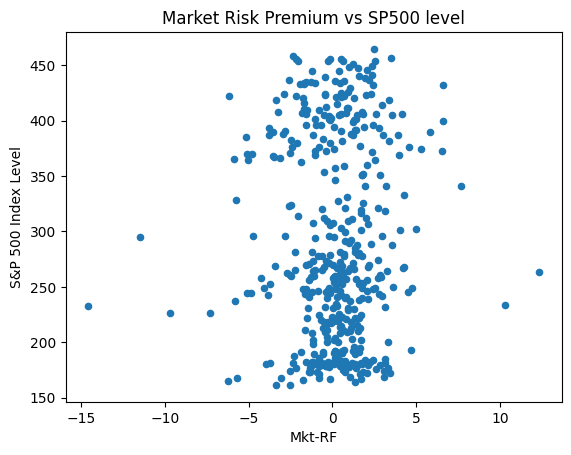

In [ ]:
df = pd.merge(spy, ff) # Merge the datasets
display(df.head()) # Display the merged datasets
display(df.plot.scatter(x = "Mkt-RF", y = "Adj Close", xlabel
                        = "Mkt-RF", ylabel = "S&P 500 Index Level", title = "Market Risk Premium vs SP500 level")) # Scatterplot comparing the market risk premium factor and the returns of the S&P 500.

In [ ]:
display(df["Mkt-RF"].mean()) # The mean market risk premium factor value for the dataset
display(df["SMB"].mean()) # The mean small minus big market capitalization factor value for the dataset
display(df["HML"].mean()) # The mean high minus low book to market value factor value for the dataset

0.21417410714285712

-0.012254464285714297

-0.047008928571428577

**Looking Forward**

Moving forward, I hope to run linear regression models on combinations of the three-factor model and different equities data, possibly incorperating macroeconomic data as well. This model will in theory be able to show correlations between different factors and the returns of different portfolios.

# **Dataset #2:**

The second dataset we are interested in studying involves Major League Baseball statistics. Both of us have a history of playing baseball and are now fans of the Chicago Cubs and Texas Rangers. James is even a member of the club baseball team here at Tulane. Given our passion for baseball and its vast records of statistics, we feel compelled to take a deep exploration into a number of possible variables.

We have identified two websites in the public domain that store a trove of information pertaining to the MLB. The two sites are the Lahman Database and Retrosheet (links to both are included below). The Lahman Database has data such as pitching, hitting, fielding, salary data, and more from 1871 to the 2022 season. Retrosheet has data covering play-by-play, team statistics, and even a few unique datasets such as ejections. Retrosheet data typically spans from 1913 to the 2022 season.

There are many variables to explore but a preliminary idea was to investigate the “keys” of success for a team. One of the most straightforward views would be to compare the total amount a team spends on player salaries and total wins for that season. This would test the theory of "spend money to make money," or in this case, to win games.

For right now, we are pulling from the Lahman database. The Lahman database is comprised of the four following main tables: MASTER, Batting, Pitching, and Fielding. These four tables contain mostly individual player data as well as historical team data. The four tables are then supplemented by several others such as Salaries, Schools, Teams, Awards (Players and Managers), and more.

In [1]:
%cd /content
!git clone https://github.com/lalbright22/DataScience2023.git
%cd /content/DataScience2023/
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/content
Cloning into 'DataScience2023'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 32 (delta 8), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (32/32), 10.13 MiB | 18.70 MiB/s, done.
Resolving deltas: 100% (8/8), done.
/content/DataScience2023


In [ ]:
!mkdir -p ../baseballdatabank-2023.1.
!unzip ../baseballdatabank-2023.1.zip -d ../baseballdatabank-2023.1.

#This unzips the data from the Retrosheet database. This will become more useful as we explore more of the data later in this project.

unzip:  cannot find or open ../baseballdatabank-2023.1.zip, ../baseballdatabank-2023.1.zip.zip or ../baseballdatabank-2023.1.zip.ZIP.


**Table 1:**
This is the Salaries data table which serves as a supplementary table to the four main tables in the Lahman database. This table consists of all player salaries dating back to 1985.

The table is organized by:


*   yearID: Year
*   teamID: Unique ID that coordinates to the team name
*   lgID: Unique ID that cooridnates to the league the team belongs to (AL or NL)
*   playerID: Unique ID that coordinates with the name of the player (this will align with MASTER table)
*   salary: The salary of the player for that year



In [3]:
salaries = pd.read_csv("Salaries.csv")

salaries.head(15)

yearID teamID lgID   playerID   salary
0     1985    ATL   NL  barkele01   870000
1     1985    ATL   NL  bedrost01   550000
2     1985    ATL   NL  benedbr01   545000
3     1985    ATL   NL   campri01   633333
4     1985    ATL   NL  ceronri01   625000
5     1985    ATL   NL  chambch01   800000
6     1985    ATL   NL  dedmoje01   150000
7     1985    ATL   NL  forstte01   483333
8     1985    ATL   NL  garbege01   772000
9     1985    ATL   NL  harpete01   250000
10    1985    ATL   NL  hornebo01  1500000
11    1985    ATL   NL  hubbagl01   455000
12    1985    ATL   NL  mahleri01   407500
13    1985    ATL   NL  mcmurcr01   275000
14    1985    ATL   NL  mumphje01   775000
15    1985    ATL   NL  murphda05  1625000
16    1985    ATL   NL  oberkke01   616667
17    1985    ATL   NL  perezpa01   450000
18    1985    ATL   NL  perryge01   120000
19    1985    ATL   NL  ramirra01   750000
20    1985    ATL   NL  suttebr01  1354167
21    1985    ATL   NL  washicl01   800000
22    1985    BAL   AL  boddimi01   625000
23    1985    BAL   AL  dauerri01   480000
24    1985    BAL   AL  davisst02   437500
25    1985    BAL   AL  dempsri01   512500
26    1985    BAL   AL  dwyerji01   375000
27    1985    BAL   AL  flanami01   641667
28    1985    BAL   AL   fordda01   450000
29    1985    BAL   AL  grosswa01   483333
30    1985    BAL   AL   lacyle01   725000
31    1985    BAL   AL   lynnfr01  1090000
32    1985    BAL   AL  martide01   560000
33    1985    BAL   AL  martiti01   440000
34    1985    BAL   AL  mcgresc01   547143
35    1985    BAL   AL  murraed02  1472819
36    1985    BAL   AL  nolanjo01   341667
37    1985    BAL   AL  rayfofl01   128500
38    1985    BAL   AL  ripkeca01   800000
39    1985    BAL   AL  roeniga01   558333
40    1985    BAL   AL  sheetla01    60000
41    1985    BAL   AL  shelbjo01   130000
42    1985    BAL   AL  stewasa01   581250
43    1985    BAL   AL  youngmi01   121000
44    1985    BOS   AL  armasto01   915000
45    1985    BOS   AL  barrema02   272500
46    1985    BOS   AL  boggswa01  1000000
47    1985    BOS   AL  bordiri01   115000
48    1985    BOS   AL   boydoi01   177500
49    1985    BOS   AL  bucknbi01   747500

**Table 2:**

This is the Teams table which consists of 48 different variables. This table comprises of various team statistics that date back to 1871. Currently, teamID is the variable that we are using to merge with the salaries table.

Below are other variables that we may find useful in the future:


*   GHome: Games played at home
*   R: Runs scored
*   H: Hits
*   2B: Doubles
*   3B: Triples
*   HR: Homeruns
*   ERA: Earned run average
*   SOA: Strikeouts by pitchers
*   FP: Fielding percentage



In [4]:
#teams = pd.read_csv("Teams.csv", header = None, names = ["yearID","lgID","teamID","franchID","divID","Rank","G","GHome","W","L","DivWin","WCWin","LgWin","WSWin","R","AB","H","2B","3B","HR","BB","SO","SB","CS","HBP","SF","RA","ER","ERA","CG","SHO","SV","IPOuts","HA","HRA","BBA","SOA","E","DP","FP","name","park","attendance","BPF","PPF","teamIDBR","teamIDlahman45","teamIDretro"])
teams = pd.read_csv("Teams.csv")

teams.head(15)



yearID lgID teamID franchID divID  Rank   G  Ghome   W   L  ...  DP     FP  \
0    1871  NaN    BS1      BNA   NaN     3  31    NaN  20  10  ...  24  0.834   
1    1871  NaN    CH1      CNA   NaN     2  28    NaN  19   9  ...  16  0.829   
2    1871  NaN    CL1      CFC   NaN     8  29    NaN  10  19  ...  15  0.818   
3    1871  NaN    FW1      KEK   NaN     7  19    NaN   7  12  ...   8  0.803   
4    1871  NaN    NY2      NNA   NaN     5  33    NaN  16  17  ...  14  0.840   

                      name                          park  attendance  BPF  \
0     Boston Red Stockings           South End Grounds I         NaN  103   
1  Chicago White Stockings       Union Base-Ball Grounds         NaN  104   
2   Cleveland Forest Citys  National Association Grounds         NaN   96   
3     Fort Wayne Kekiongas                Hamilton Field         NaN  101   
4         New York Mutuals      Union Grounds (Brooklyn)         NaN   90   

   PPF  teamIDBR  teamIDlahman45  teamIDretro  
0   98       BOS             BS1          BS1  
1  102       CHI             CH1          CH1  
2  100       CLE             CL1          CL1  
3  107       KEK             FW1          FW1  
4   88       NYU             NY2          NY2  

[5 rows x 48 columns]

**Wins and Spending Scatterplot**

This is a scatterplot of salaries and wins from the 2015 season (y-axis represents 100 millions). As you can see, there is not a strong correlation between total spending and wins in 2015. This data may change if it is compared year over year or team to team.

<Axes: title={'center': 'Total Wins vs. Total Spending'}, xlabel='Total Wins', ylabel='Total Spent on Player Salaries'>

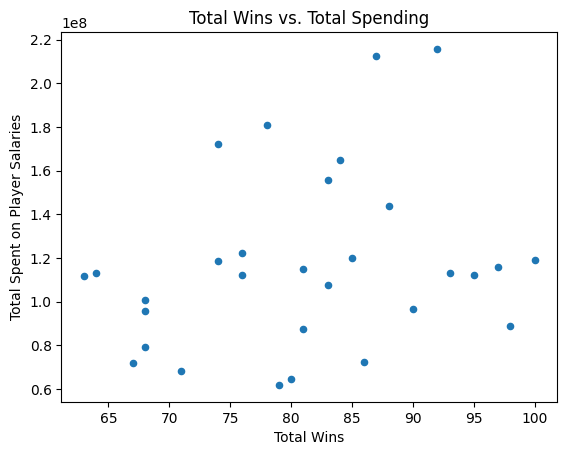

In [14]:
salaries = pd.read_csv("Salaries.csv")
teams = pd.read_csv("Teams.csv")

salaries_15 = salaries[salaries["yearID"] == 2015]
teams_15 = teams[teams["yearID"] == 2015]

#Using boolean logic on the year variable (yearID) because I only want to test my question for the year 2015 right now.

#salaries_15.dtypes
#salaries_15.head()
#teams_15.head()

#Above is commented out code when I was originally getting errors. I also used it to make sure my dataframes were correct.

team_salaries = salaries_15.groupby("teamID")["salary"].sum().reset_index() #Groups and sums the player salaries by team.

final_df = pd.merge(team_salaries, teams_15, on = "teamID") #The teamID variable is a common variable in both the salaries_15 and teams_15 dataframes. I merge the two and create a new dataframe.

final_df["W"] = pd.to_numeric(final_df["W"]) #The win variable was also nominal type but I need it to be numerical so that I can organize it into a scatterplot.
#final_df.head()

final_df = final_df.sort_values(by = "W") #Organizes the wins variable into ascending order.
final_df.plot.scatter(x = "W", y = "salary", xlabel = "Total Wins", ylabel = "Total Spent on Player Salaries", title = "Total Wins vs. Total Spending") #Creates scatterplot.

**Looking Forward**

Moving forward, we will continue to explore the "keys" to winning in the MLB. This will involve a deeper analysis of the four main data tables to look into team and individual player statistics. Some of these investigations could be batting averages, on base percentage, and strikeouts (from pitchers). Looking into individual positions may shed some light as there have been a number of team managers who have stated that fielding ability is much more important than hitting ability for the catcher and shortstop position. We could analyze the numbers of errors or passed balls allowed per game or season.

# **Important Links**

[Fama-French Data Library](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html)

[Lahman Database](https://seanlahman.com/download-baseball-database/)

[Retrosheet](https://www.retrosheet.org/)

[Yahoo Finance](https://finance.yahoo.com/)

**Miscellaneous Command Line Code**

In [ ]:
! rm -r /content/DataScience2023

#For when the directory needed to be reset whenever there was an update to our GitHub.